In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading data
us=pd.read_csv("USvideos.csv", parse_dates=['trending_date','publish_time'])
gb=pd.read_csv("GBvideos.csv", parse_dates=['trending_date','publish_time'])
de=pd.read_csv("DEvideos.csv", parse_dates=['trending_date','publish_time'])
ca=pd.read_csv("CAvideos.csv", parse_dates=['trending_date','publish_time'])
fr=pd.read_csv("FRvideos.csv", parse_dates=['trending_date','publish_time'])

In [3]:
#adding location which will be used to combine all these different datasets into one.
us['location']='US'
gb['location']='GB'
de['location']='DE'
ca['location']='CA'
fr['location']='FR'

In [4]:
#binding all the data together in one file
final = pd.concat([us,gb,de,ca,fr],axis=0,ignore_index=True)

In [5]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130648 entries, 0 to 130647
Data columns (total 17 columns):
video_id                  130648 non-null object
trending_date             130648 non-null object
title                     130648 non-null object
channel_title             130648 non-null object
category_id               130648 non-null int64
publish_time              130648 non-null object
tags                      130648 non-null object
views                     130647 non-null object
likes                     130647 non-null object
dislikes                  130647 non-null object
comment_count             130646 non-null float64
thumbnail_link            130646 non-null object
comments_disabled         130646 non-null object
ratings_disabled          130646 non-null object
video_error_or_removed    130646 non-null object
description               126123 non-null object
location                  130648 non-null object
dtypes: float64(1), int64(1), object(15)
memory usage: 1

In [6]:
final.describe()

,category_id,comment_count
count,130648.000000,1.306460e+05
mean,19.859156,5.185839e+03
std,7.315118,2.932079e+04
min,1.000000,0.000000e+00
25%,17.000000,1.680000e+02
50%,23.000000,7.480000e+02
75%,24.000000,2.791000e+03
max,129.000000,1.626501e+06


In [7]:
final.describe(include=['O'])

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,location
count,130648,130648,130648,130648,130648,130648,130647,130647,130647,130646,130646,130646,130646,126123,130648
unique,52187,132,52424,13036,52073,41605,110643,52931,12943,52165,2,2,2,45839,5
top,YBpdL9hSac4,17.22.12,Maroon 5 - Wait,The Late Show with Stephen Colbert,2018-02-23 05:00:01,[none],27604,0,0,https://i.ytimg.com/vi/YBpdL9hSac4/default.jpg,False,False,False,► Listen LIVE: http://power1051fm.com/\n► Face...,US
freq,64,1000,74,487,67,9674,6,1026,1637,64,128056,129136,130607,243,26151


In [8]:
#Checking the number of missing values
total = final.isnull().sum().sort_values(ascending=False)
percent = (final.isnull().sum()/final.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1,keys=['Total Missing values','Percentage of missing values'],ignore_index=True)
missing

,0,1
description,4525,0.034635
video_error_or_removed,2,0.000015
ratings_disabled,2,0.000015
comments_disabled,2,0.000015
thumbnail_link,2,0.000015
comment_count,2,0.000015
likes,1,0.000008
dislikes,1,0.000008
views,1,0.000008
channel_title,0,0.000000


In [9]:
#droping nan from specific rows
final =final.dropna(subset=['comment_count','views', 'likes','dislikes'])

In [10]:
#converting features into numeric type
final[['views','likes','dislikes','comment_count']] = final[['views','likes','dislikes','comment_count']].apply(pd.to_numeric)

In [11]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130646 entries, 0 to 130647
Data columns (total 17 columns):
video_id                  130646 non-null object
trending_date             130646 non-null object
title                     130646 non-null object
channel_title             130646 non-null object
category_id               130646 non-null int64
publish_time              130646 non-null object
tags                      130646 non-null object
views                     130646 non-null int64
likes                     130646 non-null int64
dislikes                  130646 non-null int64
comment_count             130646 non-null float64
thumbnail_link            130646 non-null object
comments_disabled         130646 non-null object
ratings_disabled          130646 non-null object
video_error_or_removed    130646 non-null object
description               126123 non-null object
location                  130646 non-null object
dtypes: float64(1), int64(4), object(12)
memory usage: 17.9

Correlation Matrix

               category_id     views     likes  dislikes  comment_count
category_id       1.000000 -0.123712 -0.144669 -0.013166      -0.044385
views            -0.123712  1.000000  0.777735  0.394953       0.458989
likes            -0.144669  0.777735  1.000000  0.452434       0.706632
dislikes         -0.013166  0.394953  0.452434  1.000000       0.825282
comment_count    -0.044385  0.458989  0.706632  0.825282       1.000000
_________________________________________________________________________________

Heatmap of Correlatin Matrix


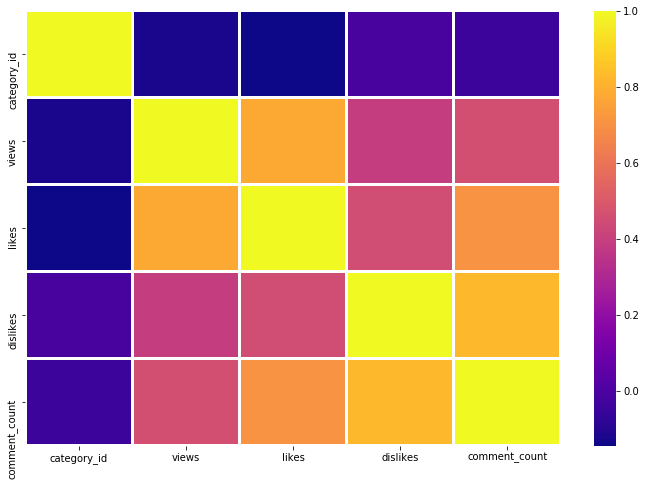

In [12]:
corr = final.corr()
print("Correlation Matrix\n")
print(corr)
print("_________________________________________________________________________________")
print("\nHeatmap of Correlatin Matrix")
plt.figure(figsize=(12,8))
sns.heatmap(corr, linewidths=2, cmap='plasma');

In [13]:
#Converting variables to the date format
final['trending_date']=pd.to_datetime(final['trending_date'],format='%y.%d.%m')
final['publish_time']=pd.to_datetime(final['publish_time'])

In [14]:
#separating date and time from publish_time
final.insert(5, 'publish_date',final['publish_time'].dt.date)
final['publish_time']=final['publish_time'].dt.time
final.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,location
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,17:13:01,SHANtell martin,748374,57527,2966,15954.0,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,US
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703.0,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",US


In [15]:
print(final.shape)
final1 = final.drop_duplicates(subset=['video_id','title'],keep='last')
print(final1.shape)
#final.index.duplicated().any()

(130646, 18)
(52661, 18)


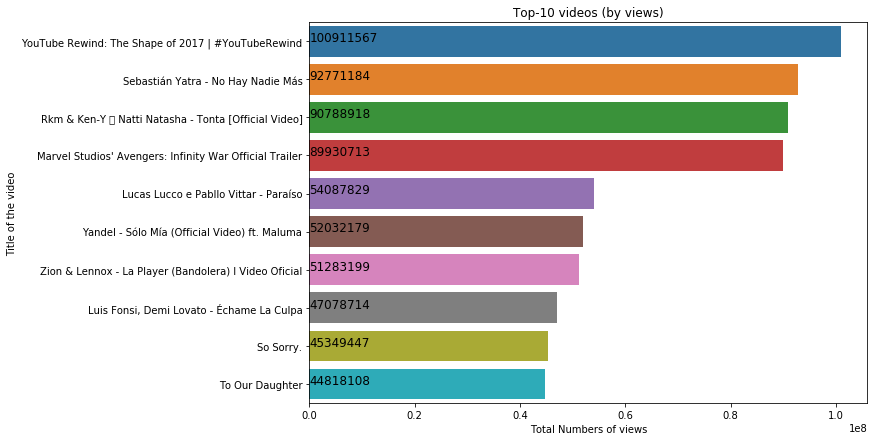

In [16]:
#top 10 videos arranged based on the number of views:
top_view=final1[['title','views']].sort_values('views',ascending=False).head(10)

plt.figure(figsize=(10,7))
sns.barplot(top_view['views'], top_view['title'])
for i, j in enumerate(top_view['views']):
    plt.text(1, i, j, color='k', fontsize=12)
plt.xlabel("Total Numbers of views")
plt.ylabel("Title of the video")
plt.title("Top-10 videos (by views)");

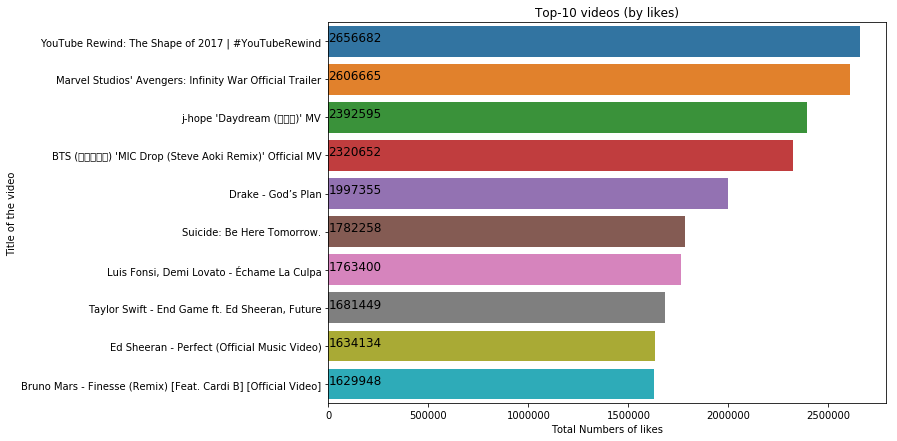

In [17]:
#top 10 videos arranged based on the number of likes:
top_view=final1[['title','likes']].sort_values('likes',ascending=False).head(10)

plt.figure(figsize=(10,7))
sns.barplot(top_view['likes'], top_view['title'])
for i, j in enumerate(top_view['likes']):
    plt.text(1, i, j, color='k', fontsize=12)
plt.xlabel("Total Numbers of likes")
plt.ylabel("Title of the video")
plt.title("Top-10 videos (by likes)");

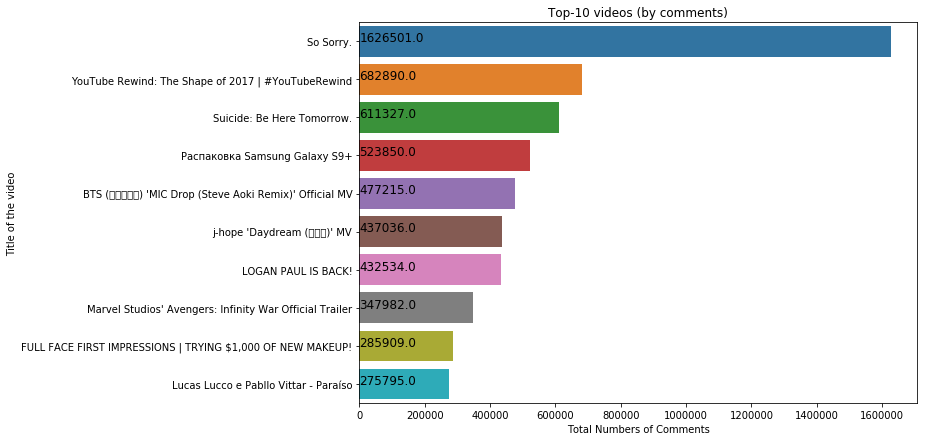

In [18]:
#top 10 videos arranged based on the number of comment:
top_view=final1[['title','comment_count']].sort_values('comment_count',ascending=False).head(10)

plt.figure(figsize=(10,7))
sns.barplot(top_view['comment_count'], top_view['title'])
for i, j in enumerate(top_view['comment_count']):
    plt.text(1, i, j, color='k', fontsize=12)
plt.xlabel("Total Numbers of Comments")
plt.ylabel("Title of the video")
plt.title("Top-10 videos (by comments)");

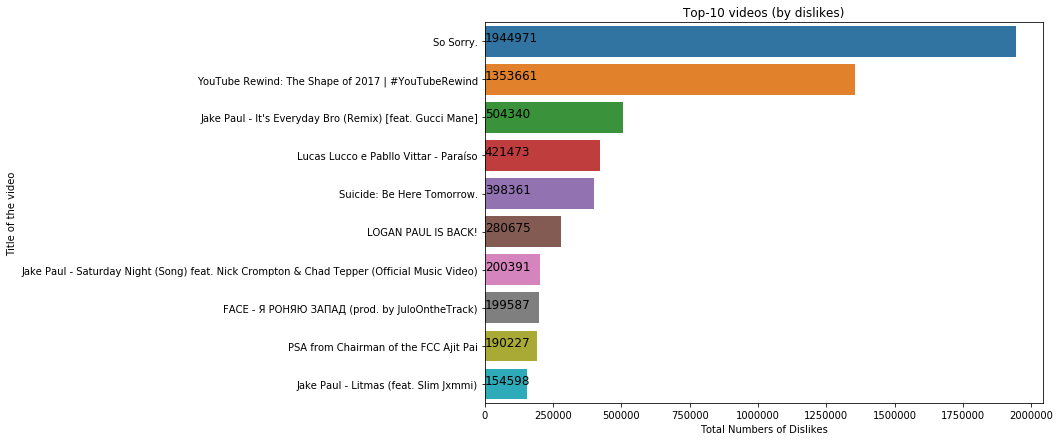

In [19]:
#top 10 videos arranged based on the number of dislikes:
top_view=final1[['title','dislikes']].sort_values('dislikes',ascending=False).head(10)

plt.figure(figsize=(10,7))
sns.barplot(top_view['dislikes'], top_view['title'])
for i, j in enumerate(top_view['dislikes']):
    plt.text(1, i, j, color='k', fontsize=12)
plt.xlabel("Total Numbers of Dislikes")
plt.ylabel("Title of the video")
plt.title("Top-10 videos (by dislikes)");

In [20]:
def stats_video_id(final1, id_list):
    ''' first argument is the data, 
        second argument consist of list of video_id
    '''
    i=0
    for index in id_list:
        if i==0:
                data = final1.loc[final1['video_id']==index]
                data=pd.DataFrame(data=data)
                i+=1
        else:
            data1=final1.loc[final1['video_id']==index]
            data1=pd.DataFrame(data=data1)
            data=pd.concat([data,data1], axis=0, ignore_index=True)
    
    plot=data[['views','likes','dislikes','comment_count']].plot(kind='bar',title='Plot')
    labels=[]
    for item in data['video_id']:
        labels.append(item)
    plot.set_xticklabels(labels,rotation=0,fontsize=10)
    plt.show()

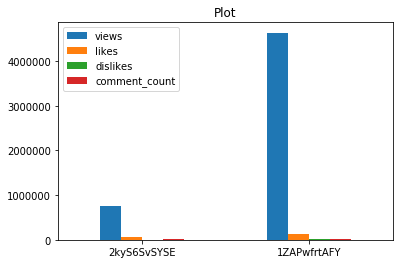

In [21]:
stats_video_id(final1, ['2kyS6SvSYSE','1ZAPwfrtAFY'])

In [22]:
def stats_title(final1, id_list):
    ''' first argument is the data, 
        second argument consist of list of title\s
    '''
    i=0
    for index in id_list:
        if i==0:
                data = final1.loc[final1['title']==index]
                data=pd.DataFrame(data=data)
                i+=1
        else:
            data1=final1.loc[final1['title']==index]
            data1=pd.DataFrame(data=data1)
            data=pd.concat([data,data1], axis=0, ignore_index=True)
    
    plot=data[['views','likes','dislikes','comment_count']].plot(kind='bar',title='Plot')
    labels=[]
    for item in data['title']:
        labels.append(item[:10]+'...')
    plot.set_xticklabels(labels,rotation=0,fontsize=10)
    plt.show()

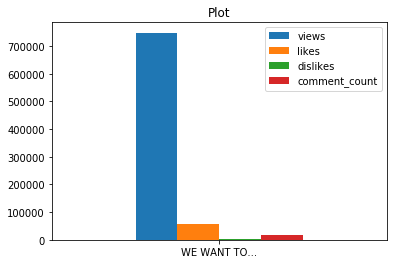

In [23]:
stats_title(final1,['WE WANT TO TALK ABOUT OUR MARRIAGE'])